In [6]:
from skimage import io , color ,data
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Загрузка изображения
img_color = io.imread('Dane 2/pl.jpg')
img_gray = io.imread('Dane 2/pl_gray.jpg')

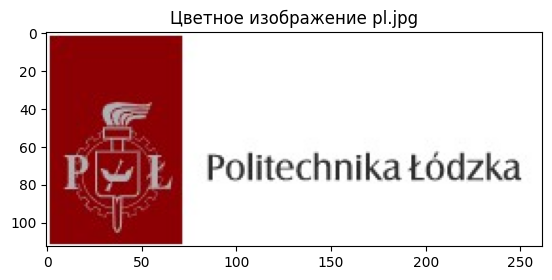

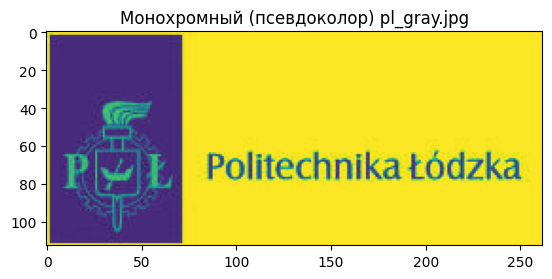

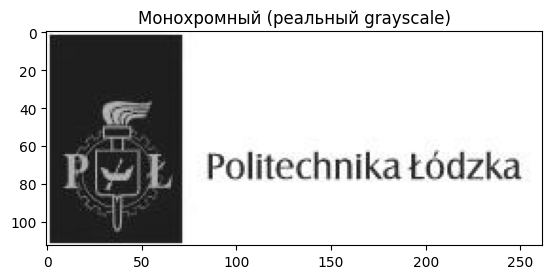

In [8]:
plt.figure()                 # открыли новое окно
plt.imshow(img_color)        # показали RGB-картинку
plt.title('Цветное изображение pl.jpg')
plt.axis('on')               # по умолчанию оси включены
plt.show()

plt.figure()  
plt.imshow(img_gray)         # без указания cmap – будет псевдоколор (viridis)
plt.title('Монохромный (псевдоколор) pl_gray.jpg')
plt.show()

plt.figure()  
plt.imshow(img_gray, cmap='gray')
plt.title('Монохромный (реальный grayscale)')
plt.show()

In [9]:
# Тип данных и размерность
def type (img):
    print("dtype:", img.dtype)
    print("shape:", img.shape)
    return 
# Минимальное и максимальное значение яркости (если grayscale) 
# или компонентов (если цветное)
def saturation (img):
    print("min" ,img.min(), "max", img.max())
    return

In [10]:
type(img_color)
saturation(img_color)

type(img_gray)
saturation(img_gray)

dtype: uint8
shape: (113, 262, 3)
min 0 max 255
dtype: uint8
shape: (113, 262)
min 0 max 255


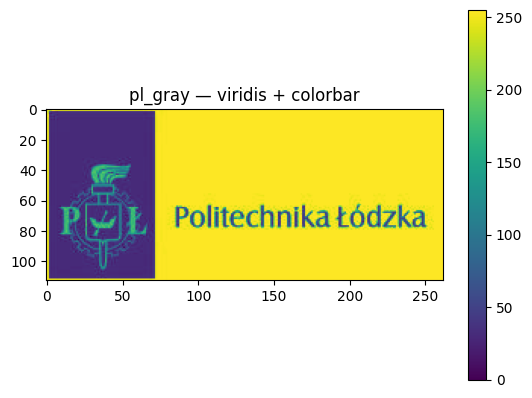

In [11]:
plt.figure()
plt.imshow(img_gray)  # псевдоколор по умолчанию
plt.title('pl_gray — viridis + colorbar')
plt.colorbar()                        # добавляем шкалу
plt.show()

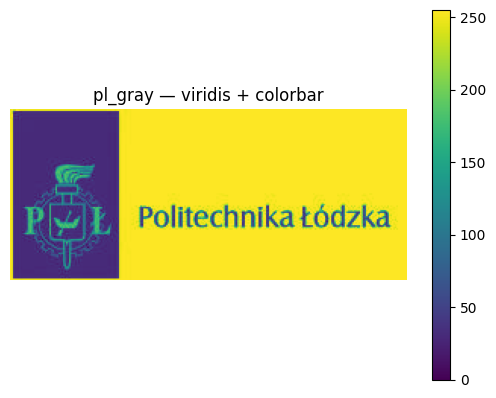

In [12]:
plt.figure()
plt.imshow(img_gray)  # псевдоколор по умолчанию
plt.title('pl_gray — viridis + colorbar')
plt.colorbar()                        # добавляем шкалу
plt.axis("off")
plt.show()

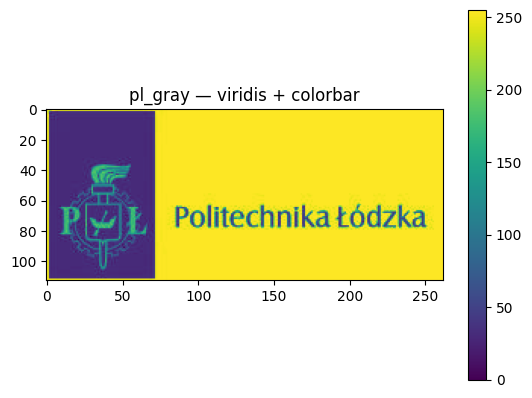

In [13]:
plt.figure()
plt.imshow(img_gray)  # псевдоколор по умолчанию
plt.title('pl_gray — viridis + colorbar')
plt.colorbar()                        # добавляем шкалу
plt.axis("on")
plt.show()

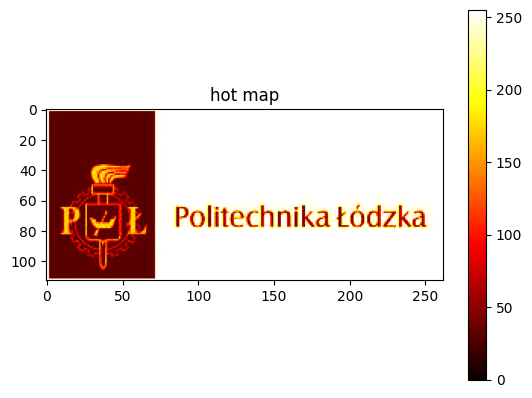

In [14]:
plt.figure()
plt.imshow(img_gray, cmap="hot")
plt.title("hot map")
plt.colorbar()
plt.axis("on")
plt.show()

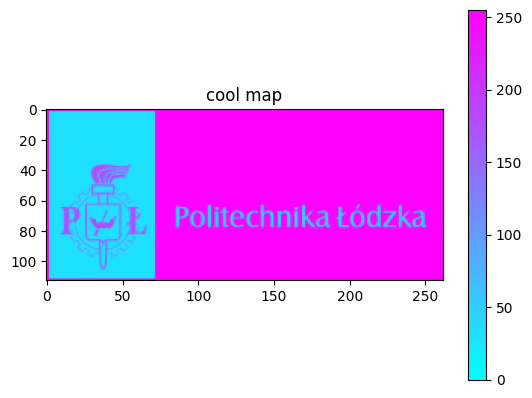

In [15]:
plt.figure()
plt.imshow(img_gray, cmap="cool")
plt.title("cool map")
plt.colorbar()
plt.axis("on")
plt.show()

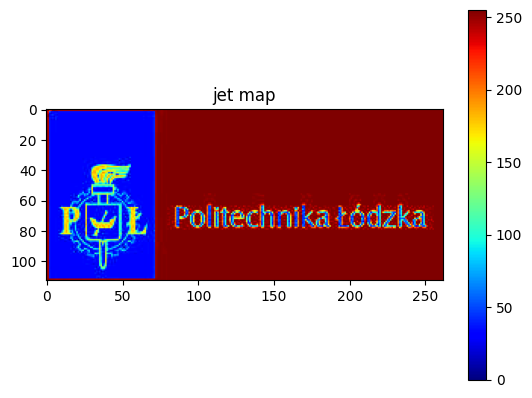

In [16]:
plt.figure()
plt.imshow(img_gray, cmap="jet")
plt.title("jet map")
plt.axis("on")
plt.colorbar()
plt.show()

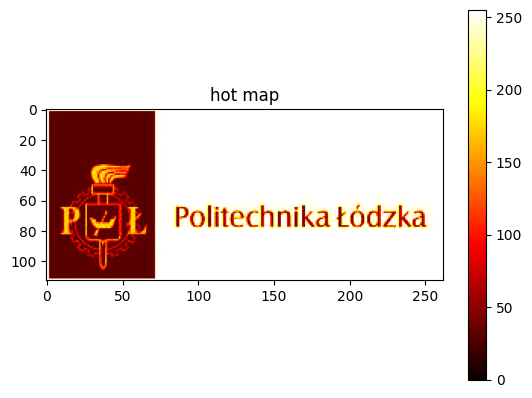

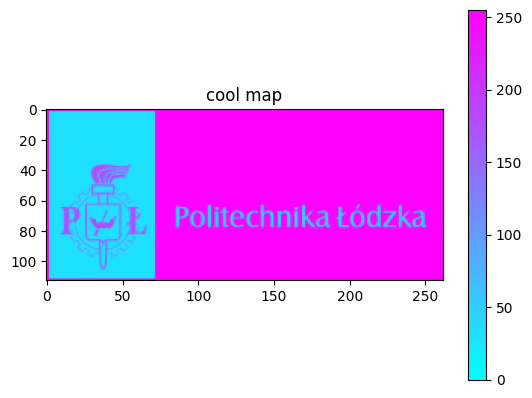

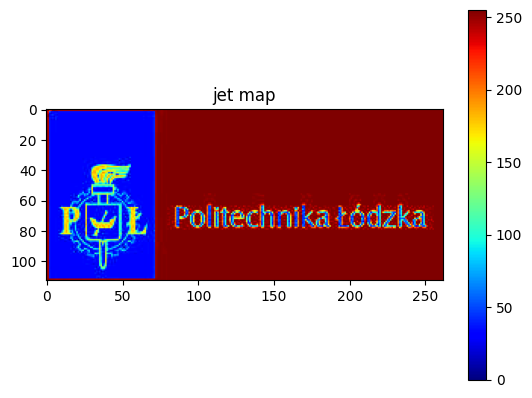

In [17]:


for map in ['hot', 'cool', 'jet']:
    plt.figure()
    plt.imshow(img_gray, cmap=map)
    plt.title(f'{map} map')
    plt.colorbar()
    plt.axis()
    plt.show

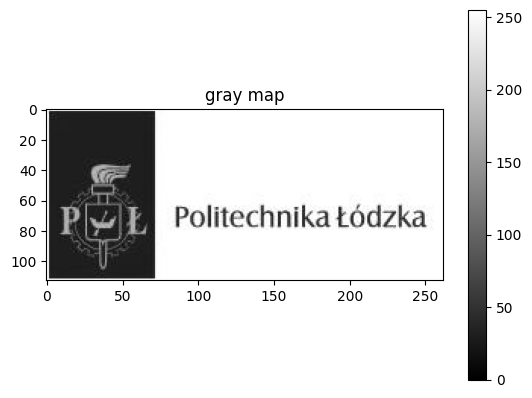

In [18]:
plt.figure()
plt.imshow(img_gray, cmap="gray")
plt.title("gray map")
plt.axis("on")
plt.colorbar()
plt.show()

In [19]:
def plot_g(img, map, filnam , tor):
    plt.figure()
    plt.imshow(img, cmap=map)
    plt.title(f'{map} map')
    plt.axis(tor)
    plt.colorbar()
    plt.savefig(f'{filnam}_{map}_{tor}.png', bbox_inches='tight')
    plt.show()
    return

def plot_color(img,  filnam , tor):
    plt.figure()
    plt.imshow(img)
    plt.title('RGB')
    plt.axis(tor)
    plt.savefig(f'{filnam}_RGB.png', bbox_inches='tight')
    plt.show()
    return

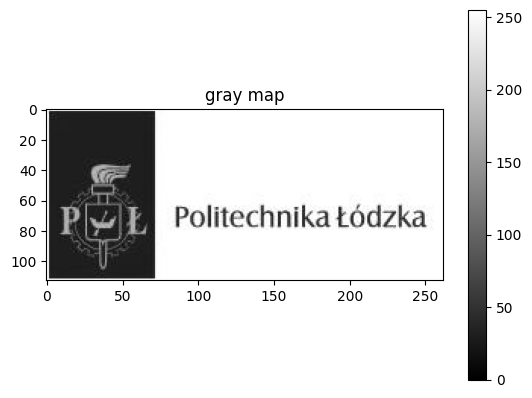

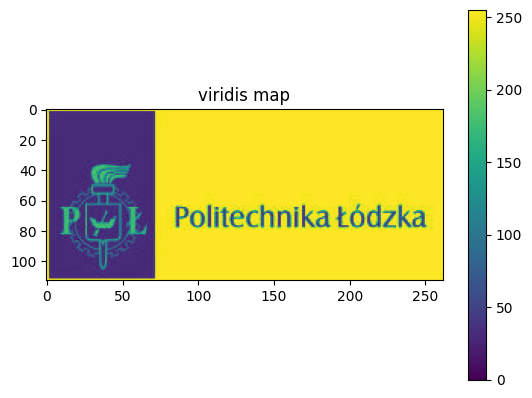

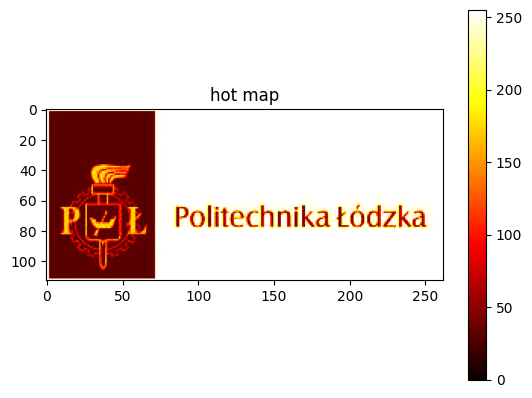

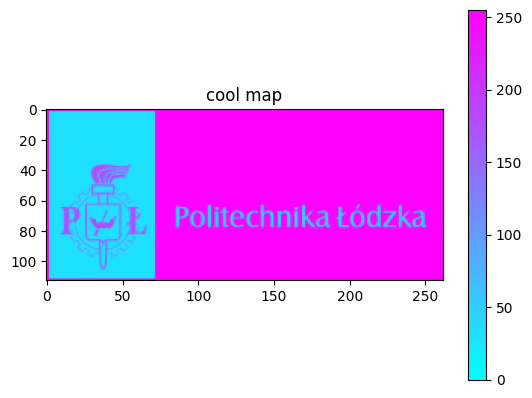

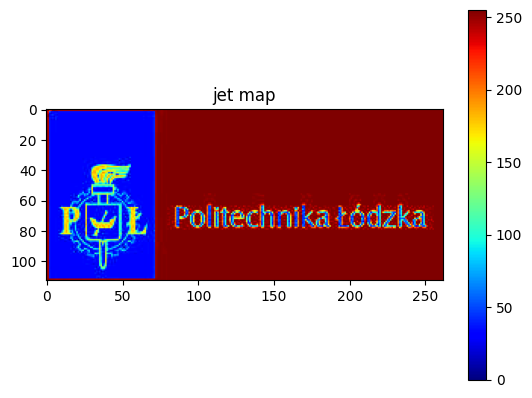

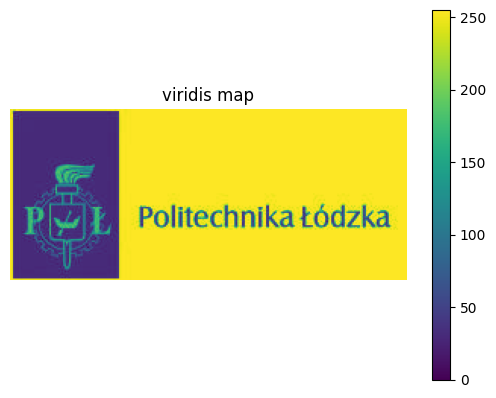

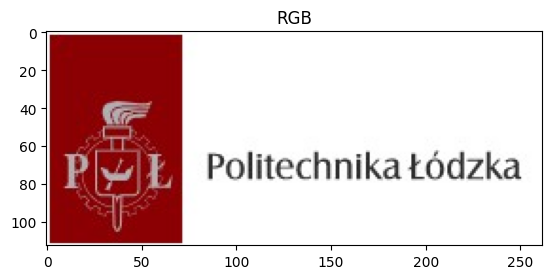

In [20]:
plot_g(img_gray,'gray','pl_gray','on')
plot_g(img_gray,'viridis','pl_gray','on')
plot_g(img_gray,'hot','pl_gray','on')
plot_g(img_gray,'cool','pl_gray','on')
plot_g(img_gray,'jet','pl_gray','on')
plot_g(img_gray,'viridis','pl_gray','off')

plot_color(img_color,'pl_color', 'on')

In [21]:
def reg_plot(img,filnam):
    plt.figure()
    plt.imshow(img)
    plt.title('camera_slis_r')
    plt.axis("on")
    plt.savefig(f'{filnam}.png')
    plt.show()
    return

dtype: uint8
shape: (225, 225, 3)


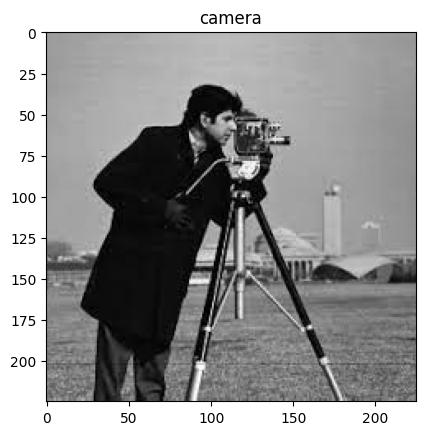

In [22]:
img_camera=io.imread('Dane 2/camera.jpg')
type(img_camera)
plt.figure()
plt.imshow(img_camera)
plt.title('camera')
plt.axis("on")
plt.show()


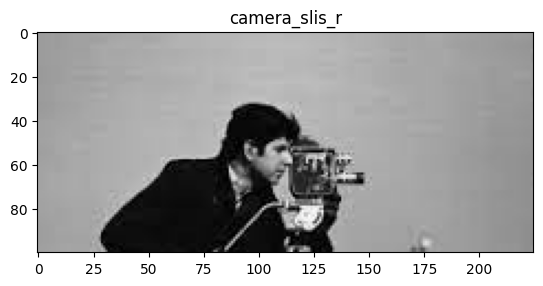

In [23]:
camera_slis=img_camera[:100, :]
reg_plot(camera_slis,'camera_slis')


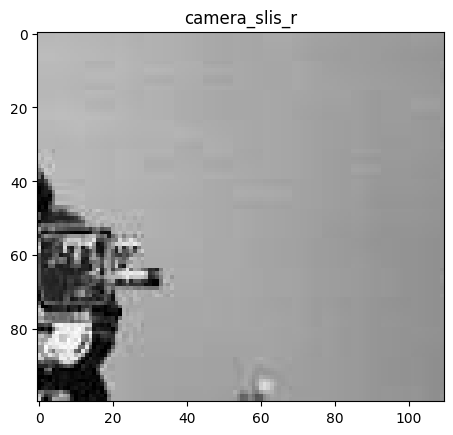

In [24]:
camera_slis_r=camera_slis[:, 115:]
reg_plot(camera_slis_r,'camera_slis_r')


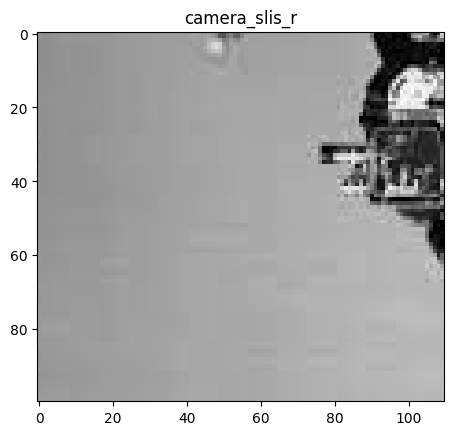

In [25]:
camera_rot180=np.rot90(camera_slis_r,2)
reg_plot(camera_rot180,'camera_rot90')

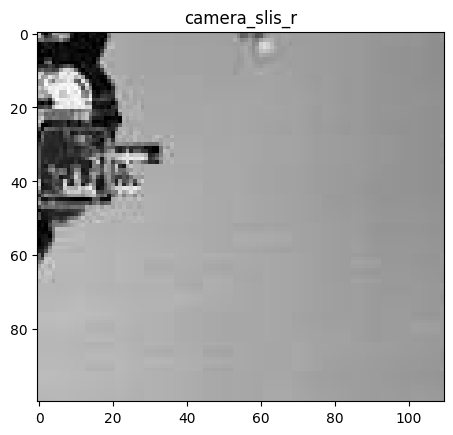

In [26]:
camera_lust=np.fliplr(camera_rot180)
reg_plot(camera_lust,'camera_lust')


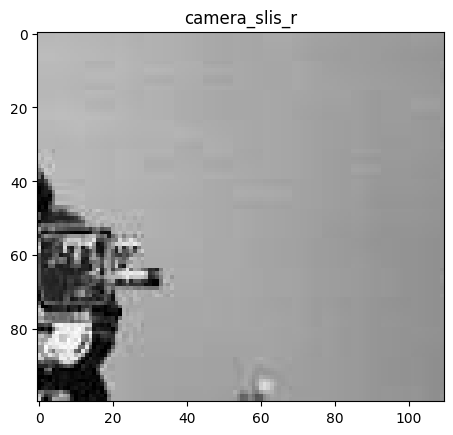

In [27]:
camera_lust_ud=np.flipud(camera_lust)
reg_plot(camera_lust_ud,'camera_lust_ud')

In [28]:
w,h,kb =img_camera.shape
print(f'{w}_{h}_{kb}')

225_225_3


dtype: uint8
shape: (512, 512, 3)


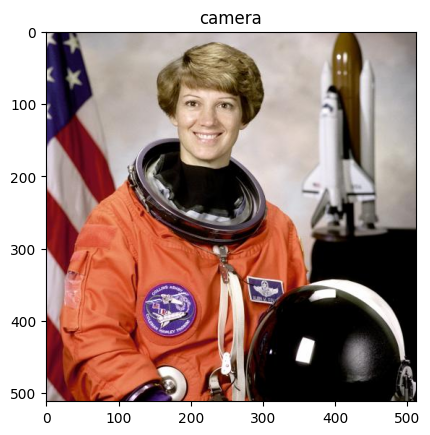

In [29]:
img_astro=io.imread('Dane 2/atronaut.jpg') 
type(img_astro)
plt.figure()
plt.imshow(img_astro)
plt.title('camera')
plt.axis("on")
plt.show()



dtype: float64
shape: (512, 512)


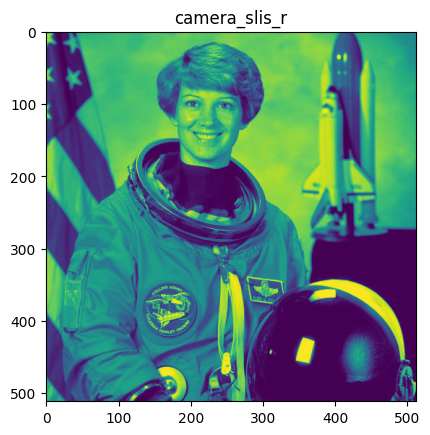

height= 512 width= 512


In [30]:
img_astro_gray=color.rgb2gray(img_astro)
type(img_astro_gray)
reg_plot(img_astro_gray,'img_astro_gray')
height,width =img_astro_gray.shape
print('height=',height,"width=",width)

<function matplotlib.pyplot.show(close=None, block=None)>

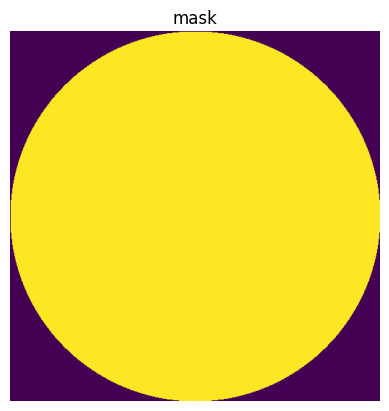

In [31]:
x, y = np.ogrid[:height, :width] 
mask = (x - height / 2)**2 + (y - width / 2)**2 < (height / 2)**2 

plt.figure()
plt.imshow(mask)
plt.title("mask")
plt.axis('off')
plt.savefig('mask_img.png')
plt.show

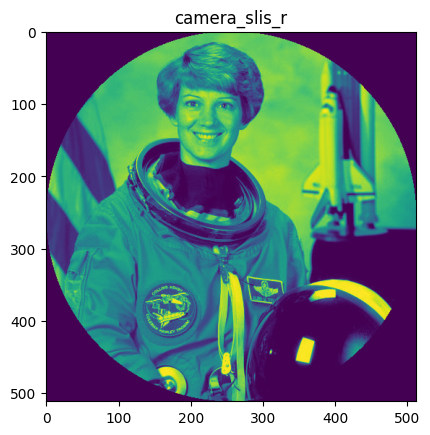

In [32]:
img_astro_gray_mask=img_astro_gray*mask
reg_plot(img_astro_gray_mask,'img_astro_gray_mask')

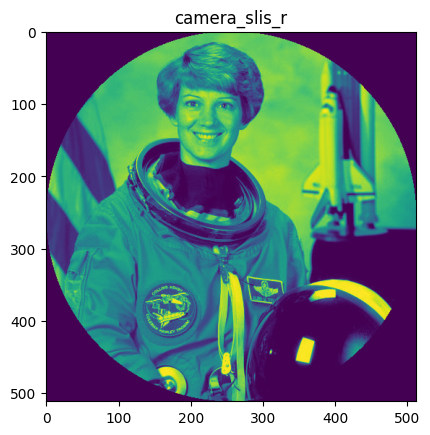

In [33]:
img_astro_gray[mask==0]=0
reg_plot(img_astro_gray,"mask1")

In [34]:
img_astro_copi=io.imread('Dane 2/atronaut.jpg')

R = img_astro_copi[:, :, 0]
G = img_astro_copi[:, :, 1]
B = img_astro_copi[:, :, 2]

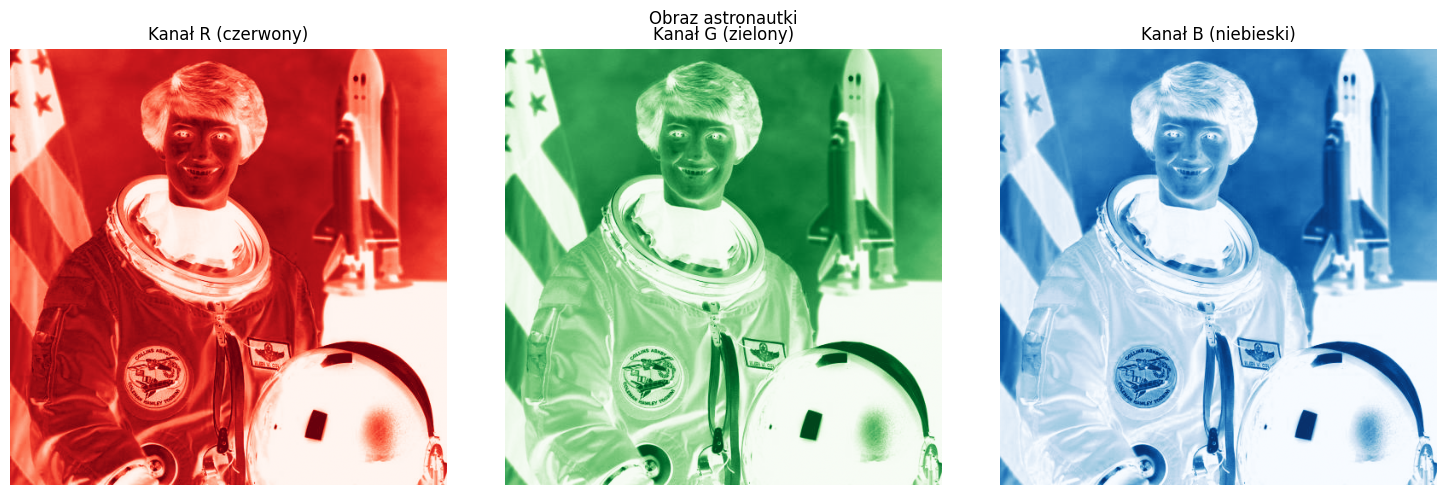

In [35]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(R, cmap='Reds')
axs[0].set_title('Kanał R (czerwony)')
axs[0].axis('off')

axs[1].imshow(G, cmap='Greens')
axs[1].set_title('Kanał G (zielony)')
axs[1].axis('off')

axs[2].imshow(B, cmap='Blues')
axs[2].set_title('Kanał B (niebieski)')
axs[2].axis('off')
plt.suptitle('Obraz astronautki')
plt.tight_layout()
plt.savefig('astronaut_rgb_channels.png', bbox_inches='tight')
plt.show()

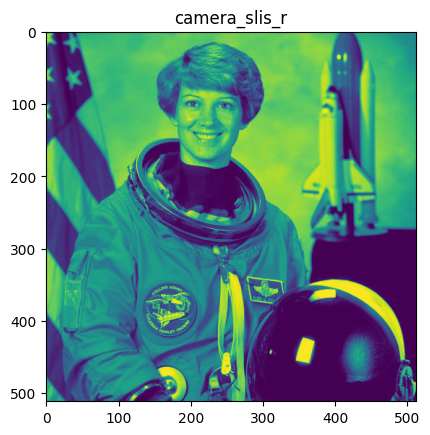

In [36]:
img_astro_gray_29=color.rgb2gray(img_astro_copi)
reg_plot(img_astro_gray_29,'img_astro_gray_29')

In [49]:
img_float=img_astro_copi/255.0
type(img_float)
saturation(img_float)
type(img_astro_copi)
saturation(img_astro_copi)
img_float1=img_float*255
type(img_float1)
saturation(img_float1)
R=img_float[:,:,0]
G=img_float[:,:,1]
B=img_float[:,:,2]

gray_manual = 0.2125 * R + 0.7154 * G + 0.0721 * B

dtype: float64
shape: (512, 512, 3)
min 0.0 max 1.0
dtype: uint8
shape: (512, 512, 3)
min 0 max 255
dtype: float64
shape: (512, 512, 3)
min 0.0 max 255.0


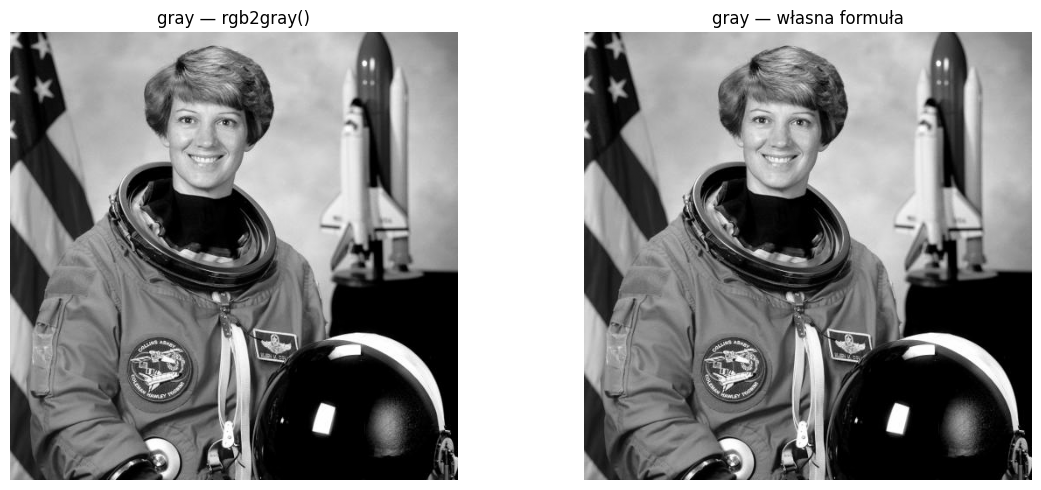

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].imshow(img_astro_gray_29, cmap='gray')
axs[0].set_title('gray — rgb2gray()')
axs[0].axis('off')

axs[1].imshow(gray_manual, cmap='gray')
axs[1].set_title('gray — własna formuła')
axs[1].axis('off')

plt.tight_layout()
plt.savefig('pl_gray_compare.png', bbox_inches='tight')
plt.show()

In [ ]:
img_uint8 = (img_astro_gray_29 * 255).astype(np.uint8)
io.imsave('img_astro_gray_29.jpg',img_uint8)

In [40]:
img_astro = data.astronaut()
img_gray_float = color.rgb2gray(img_astro)
img_gray_uint8 = (img_gray_float * 255).astype(np.uint8)
io.imsave('astro_gray45.jpg', img_gray_uint8)
io.imsave('astro_gray45.png', img_gray_uint8)

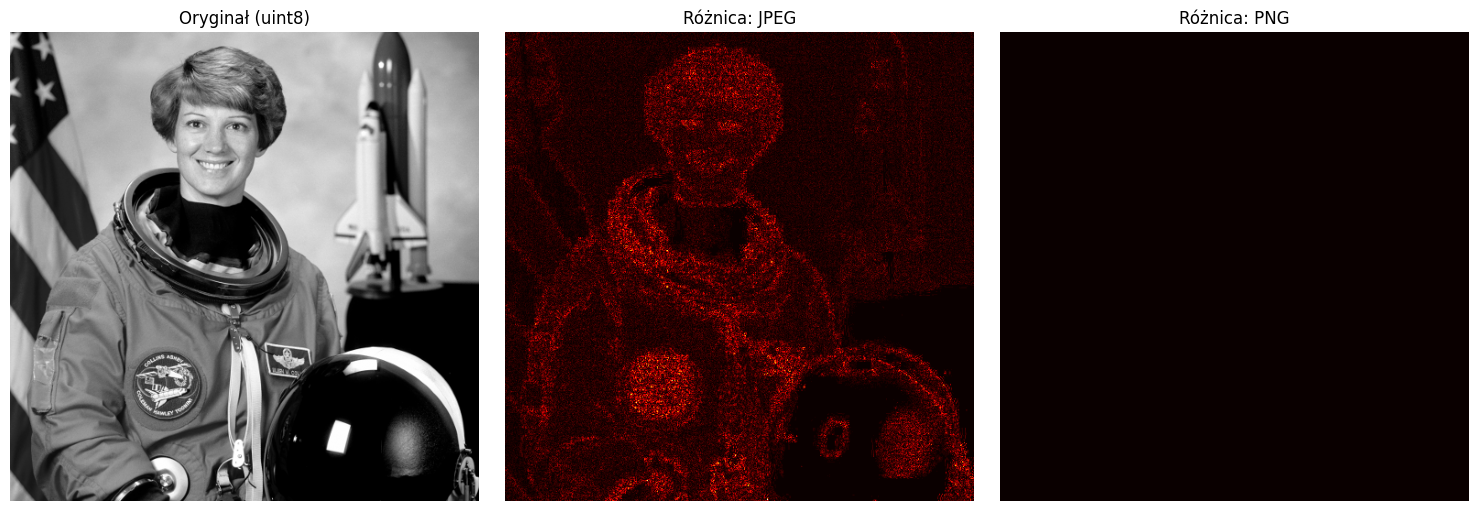

In [41]:
# 36. Повторная загрузка JPEG и PNG
img_jpg = io.imread('astro_gray45.jpg')
img_png = io.imread('astro_gray45.png')

# 37. Разница между оригиналом и сохранёнными
diff_jpg = img_gray_uint8.astype(int) - img_jpg.astype(int)
diff_png = img_gray_uint8.astype(int) - img_png.astype(int)

# Визуализация
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(img_gray_uint8, cmap='gray')
axs[0].set_title('Oryginał (uint8)')
axs[0].axis('off')

axs[1].imshow(np.abs(diff_jpg), cmap='hot')
axs[1].set_title('Różnica: JPEG')
axs[1].axis('off')

axs[2].imshow(np.abs(diff_png), cmap='hot')
axs[2].set_title('Różnica: PNG')
axs[2].axis('off')

plt.tight_layout()
plt.savefig('astro_diff_compare.png', bbox_inches='tight')
plt.show()


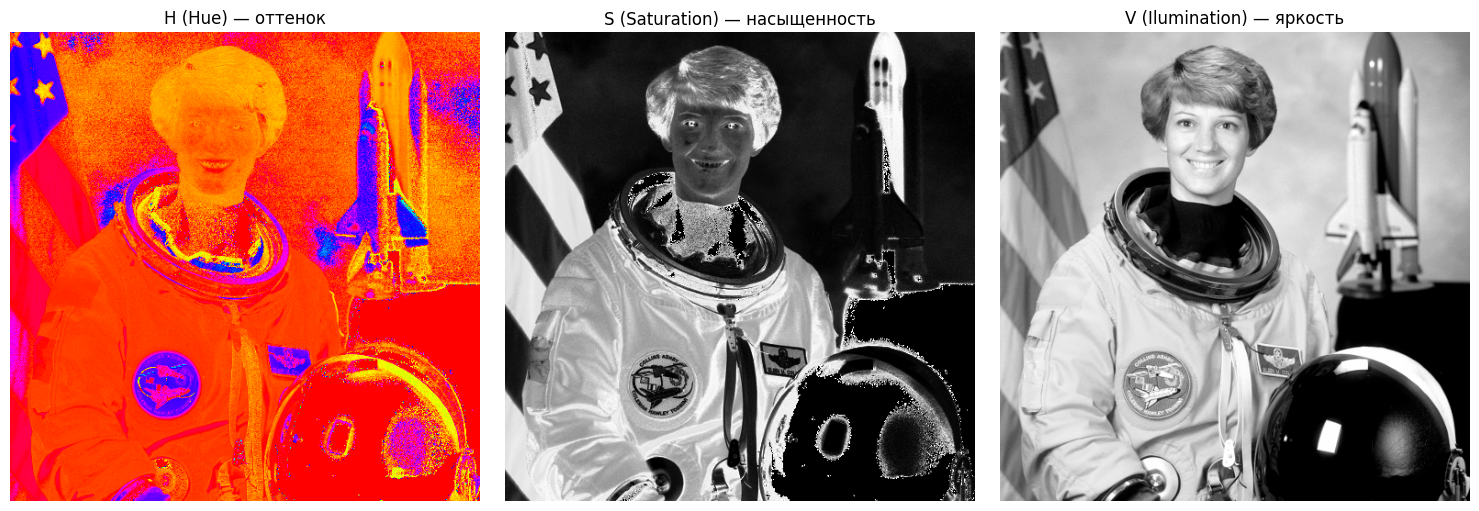

In [42]:
# 39. Повторная загрузка изображения астронавта без искажений
img_astro = data.astronaut()

# 40. Преобразование в HSV
img_hsv = color.rgb2hsv(img_astro)

# Извлечение каналов
H = img_hsv[:, :, 0]
S = img_hsv[:, :, 1]
V = img_hsv[:, :, 2]

# Отображение
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(H, cmap='hsv')
axs[0].set_title('H (Hue) — оттенок')
axs[0].axis('off')

axs[1].imshow(S, cmap='gray')
axs[1].set_title('S (Saturation) — насыщенность')
axs[1].axis('off')

axs[2].imshow(V, cmap='gray')
axs[2].set_title('V (Ilumination) — яркость')
axs[2].axis('off')

plt.tight_layout()
plt.savefig('astronaut_hsv_channels.png', bbox_inches='tight')
plt.show()

Pytanie 1:
Obraz analogowy jest ciągły, np. klisza fotograficzna.
Obraz cyfrowy składa się z pikseli i wartości liczbowych, np. zdjęcie z telefonu.

Pytanie 2:
Typ danych: uint8, zakres wartości: 0–255.
Rozmiar (np. 113, 262, 3): wysokość, szerokość, liczba kanałów (RGB).

Pytanie 3:
Drugi obraz miał tylko 2 wymiary (113, 262), bo to skala szarości.
Typ też uint8, zakres: 0–255.

Pytanie 4:
Obraz kolorowy ma 3 kanały (R, G, B), obraz w skali szarości – 1 kanał z jasnością.

Pytanie 5:
Pseudokolor podkreśla różnice w danych.
Użyteczne w medycynie – np. termografia, obrazy MRI.

Pytanie 6:
x, y – współrzędne w pionie i poziomie.
Wyrażenie tworzy maskę kołową – wartości True w środku obrazu.

Pytanie 7:
Maska ma taki sam rozmiar jak obraz. Działa piksel po pikselu.

Pytanie 8:
Czerwony (R) – wysoki w paskach flagi i emblemacie.
Zielony (G) – większy w tle i skafandrze.
Niebieski (B) – niski prawie wszędzie, poza flagą.

Pytanie 9:
Format TIFF — bezstratny, jak PNG, ale obsługuje więcej danych.

Pytanie 10:
Zniekształcenia JPEG są widoczne w detalach (np. krawędzie, twarz).
Małe różnice w jednolitych obszarach (np. tło).

Pytanie 11:
Wartości H, S, V mieszczą się w przedziale 0–1.
RGB ma zakres 0–255 (lub 0.0–1.0 po normalizacji).